# panda to work on time series 

### remarque très importante : pandas utilise matplotlib en arrière plan 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3630,2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,64333.542969,18827683555
3631,2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,62880.660156,27682040631
3632,2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,59504.132813,39103882198
3633,2024-08-28,59507.925781,60236.449219,57890.675781,59027.625000,59027.625000,40289564698


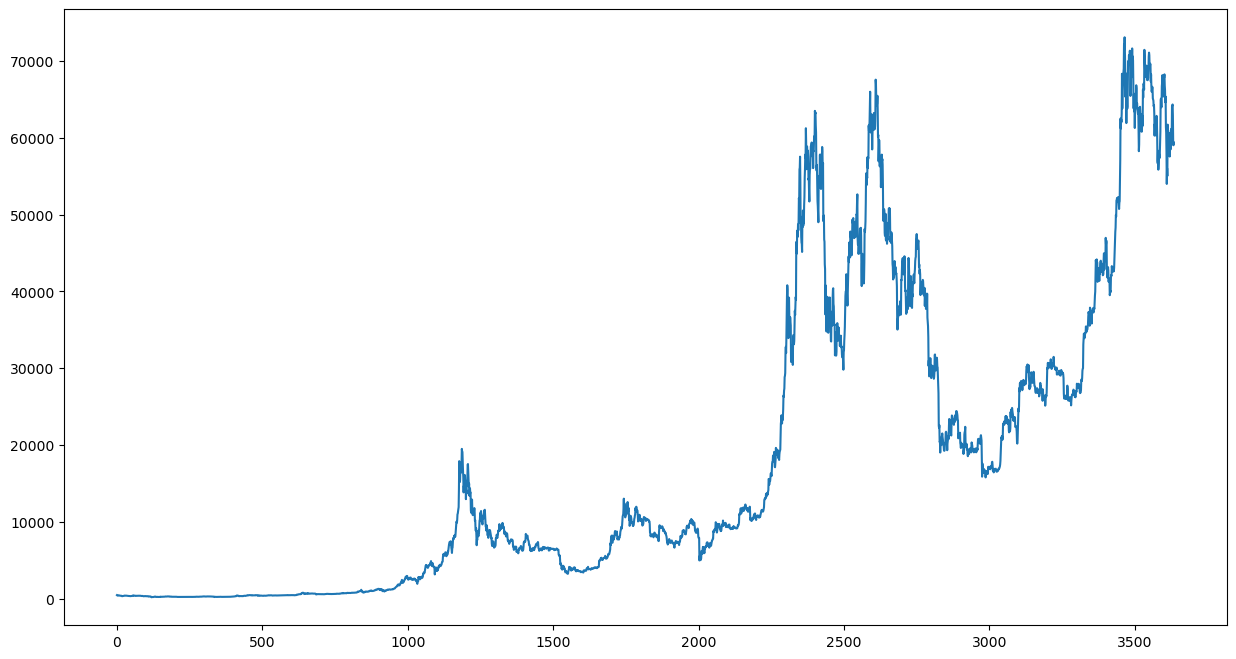

In [2]:
df=pd.read_csv('BTC-USD.csv')
df['Close'].plot(figsize=(15,8))
df

In [3]:
df.index  
# we would have timing evlultion and not just index like 1,2,3,4,5 that why we should use index_col
#parse_dates it's to say to pandas that it should interprate the index_col as a date 

RangeIndex(start=0, stop=3635, step=1)

In [4]:
di=pd.read_csv('BTC-USD.csv', index_col='Date',parse_dates=True)

In [5]:
di.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23',
               '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29'],
              dtype='datetime64[ns]', name='Date', length=3635, freq=None)

In [6]:
di

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,64333.542969,18827683555
2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,62880.660156,27682040631
2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,59504.132813,39103882198


<Axes: xlabel='Date'>

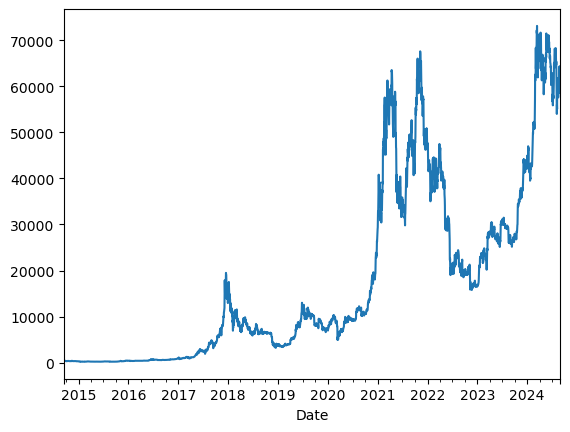

In [7]:
# we can do slicing and indexing but in dates 
di['Close'].plot()

<Axes: xlabel='Date'>

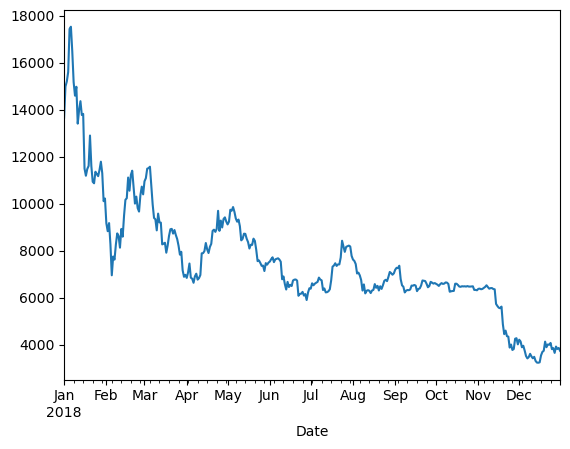

In [8]:
di['Close']['2018'].plot()

### indexing 

<Axes: xlabel='Date'>

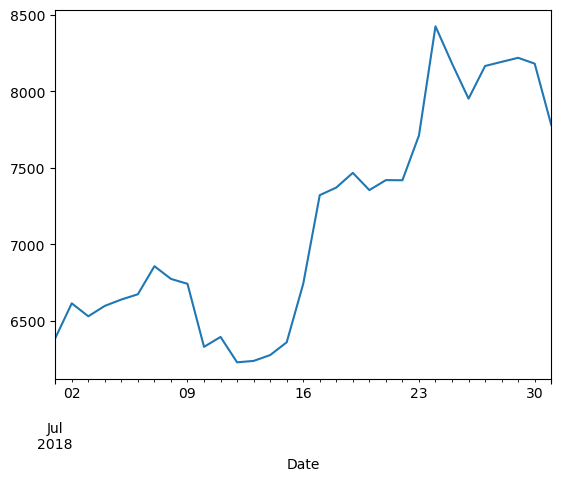

In [9]:
di['Close']['2018-7'].plot()

### slicing 

<Axes: xlabel='Date'>

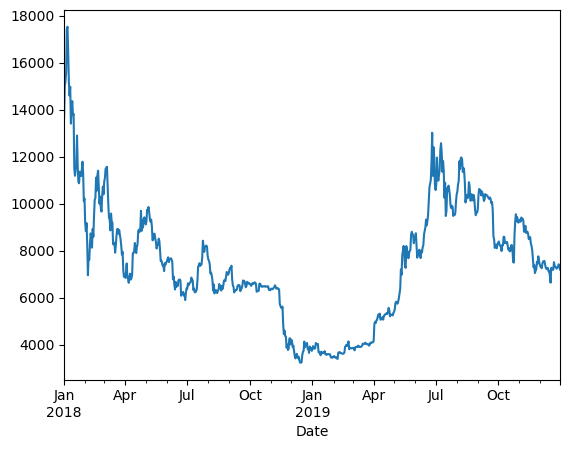

In [10]:
di['Close']['2018':'2019'].plot()  # we can also use loc() function 

In [11]:
# panda peut comprendre la notion de temps complétement avec des date, heure , second......
# même s'il ne comprend pas on peut utiliser la fonciton to_datetime('le style')
# et les bénifices sont vraiment multiples grace à ça on peut vraiment étuder des données qui change tootes 
#les seconds les milisecond ou plus que ça 

<Axes: xlabel='Date'>

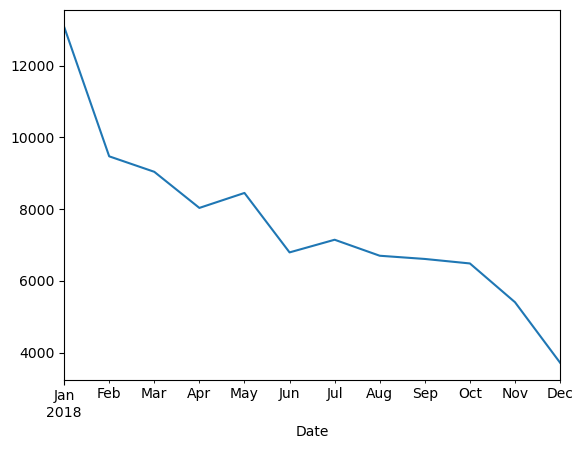

In [12]:
di.loc['2018','Close'].resample('M').mean().plot()
# 'M ' indique qu'on veut travailler selon les mois et à chaque mois calculer the mean() et l'est afficher 
#selon un plot 


In [13]:
#df.loc['2018','Close'].resample('2W').mean().plot() , calculate the mean all the two weeks and we can do 
#the same thing the time period.

In [14]:
di.loc['2018', 'Low'].resample('W').agg(['mean', 'std', 'max', 'min']).head(5) # indicate the line then the column 

,mean,std,max,min
Date,,,,
2018-01-07,14820.014230,1362.671260,16764.599609,13154.700195
2018-01-14,13686.828683,528.874091,14424.000000,13105.900391
2018-01-21,11185.412946,1321.954315,13641.700195,9402.290039
2018-01-28,10714.557199,483.739284,11475.299805,10129.700195
2018-02-04,9126.348702,1244.824262,11179.200195,7796.490234


<class 'pandas.core.frame.DataFrame'>


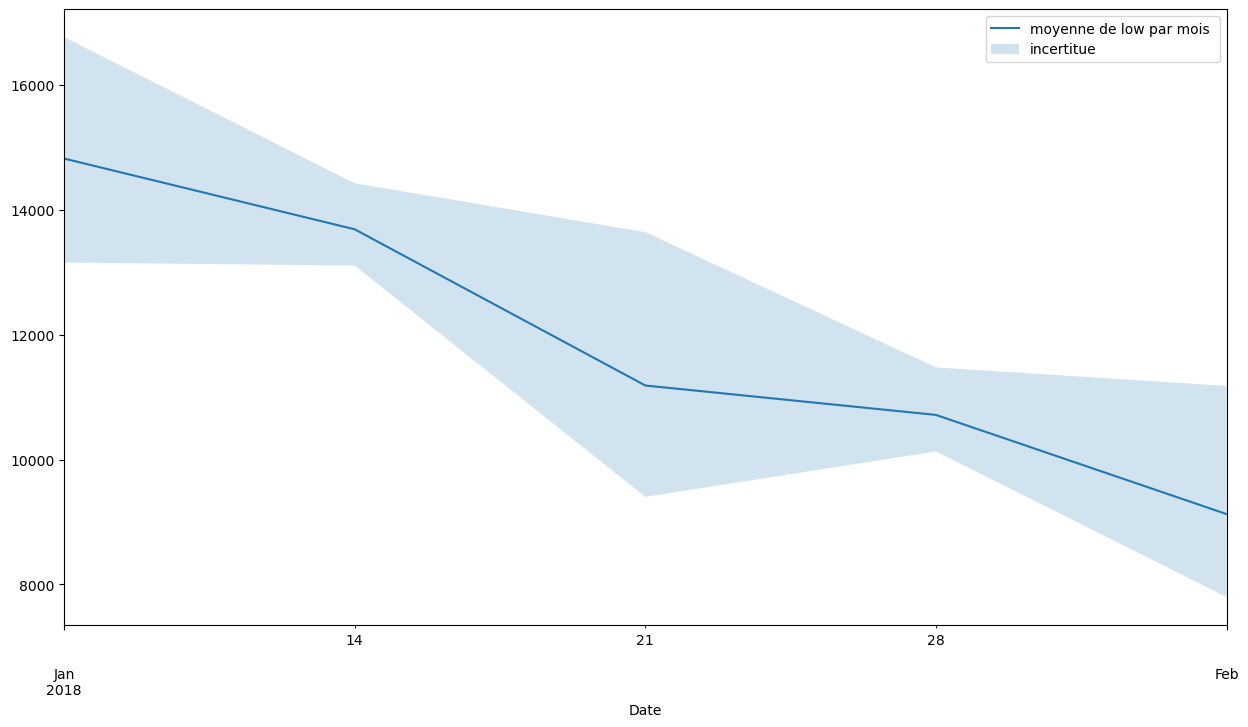

In [15]:
m=di.loc['2018', 'Low'].resample('W').agg(['mean', 'std', 'max', 'min']).head(5)
print(type(m))
plt.figure(figsize=(15,8))
m['mean']['2018'].plot(label='moyenne de low par mois ')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='incertitue')
plt.legend()
plt.show()



## moving average 

<Axes: xlabel='Date'>

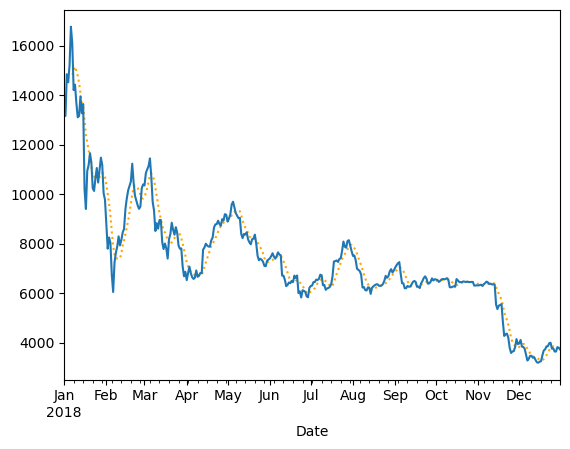

In [16]:
#function which we can calculate the average of each periode of time in an interval of time

plt.figure()
di['Low']['2018'].rolling(window=7).mean().plot(ls=':',label='rolling plot', color='orange') #indicate the column then the line 
# window=7 means that the mean will be calculated each seven sample of the data frame
di['Low']['2018'].plot()


<Axes: xlabel='Date'>

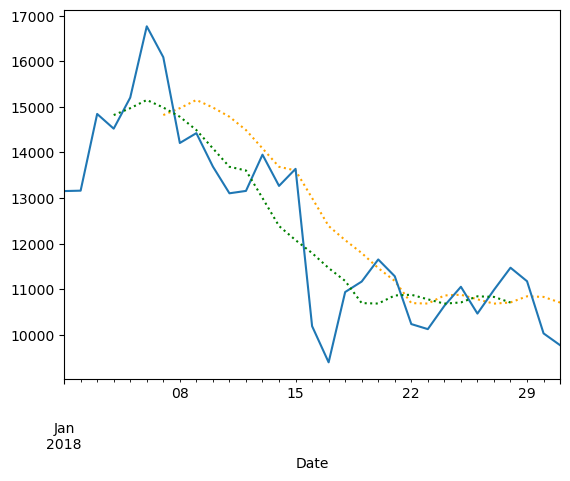

In [17]:
plt.figure()
di['Low']['2018-1'].rolling(window=7).mean().plot(ls=':',label='rolling plot', color='orange') 

di['Low']['2018-1'].plot() 


#we note that the rolling plot don't begin with the first day
#ce decalage existe parce-que tout simplement on a calculté la  moyenne et après on a la placé dans le
#derner jour on placer cette point au centre
di['Low']['2018-1'].rolling(window=7, center=True).mean().plot(ls=':',label='rolling plot', color='green') 

#même si avec centering on pas bien visualiser ça et c'est où s'apparait l'importance de 'la moyenne mobile
#exponentielle'

$$\sum_{n=1}^{\infini} \alpha * (\alpha - 1) X\index{t-n}$$

### cette fonction perment de reduire l'impact des valeur sur une moyenne qu'on le temps passe 

<Axes: xlabel='Date'>

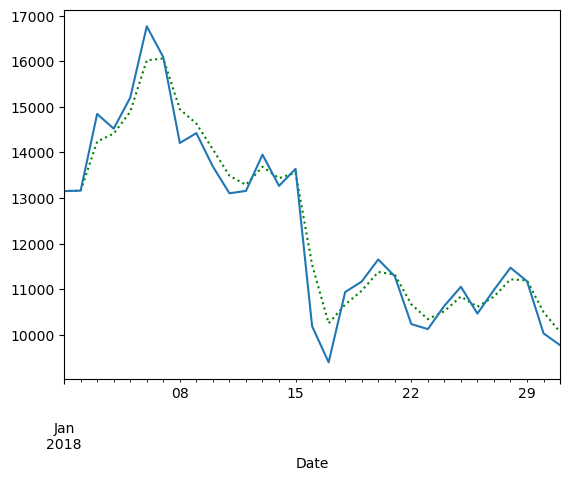

In [18]:
di['Low']['2018-1'].ewm(alpha=0.6).mean().plot(ls=':',label='rolling plot', color='green') 
di['Low']['2018-1'].plot() 
#alpha peut pas prendre que des valeur inferieur à 1 
#là on peut constater que la courbe de moyenne suive un petit peu la courbe de d'evolution reel

### influence de alpha 

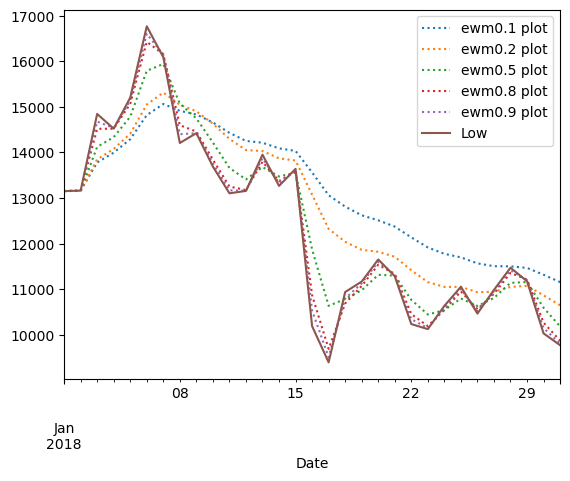

In [19]:

for i in [0.1,  0.2, 0.5, 0.8, 0.9] :
    di['Low']['2018-1'].ewm(alpha=i).mean().plot(ls=':',label=f'ewm{i} plot') 

di['Low']['2018-1'].plot() 
    
plt.legend()

In [20]:
# on peut constater que plus alpha augmente la courbe de la moyenne est plus compatible avec Low

## assembler deux dataframe 

### comparer le betcoin avec l'etirium

In [21]:
de=pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates=True)

In [22]:
# merge two datafram
# pandas et par contre à numpy on peut merger deux dataframe même s'ils ont pas les même dimension 
# et dans notre cas on sait que l'etherieum et plus récent que le betcoin 
# parse== analyse 

In [23]:
pd.merge(di, de, on='Date', how='inner', suffixes=('_BTC','_ETH')).head(-5) #si on utilise df ça va pas travailler 

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj Close_BTC,Volume_BTC,Open_ETH,High_ETH,Low_ETH,Close_ETH,Adj Close_ETH,Volume_ETH
Date,,,,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,59493.453125,61396.328125,58610.882813,59012.792969,59012.792969,31613400008,2637.306396,2695.913818,2556.747559,2573.106934,2573.106934,13249483464
2024-08-21,59014.988281,61834.351563,58823.445313,61175.191406,61175.191406,32731154072,2573.108887,2662.953369,2538.657715,2631.395508,2631.395508,12766015263
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914063,60381.914063,27625734377,2630.864258,2644.823730,2587.110596,2622.951416,2622.951416,10723280428


In [24]:
# inner pour intersection des dates outer pour les index des deux et les valeur vide remplacé par NAN.
# left on se base sur 'di', right on se base sur 'de'

In [25]:
btc_eth =pd.merge(di, de, on='Date', how='inner', suffixes=('_BTC','_ETH'))

<Axes: xlabel='Date'>

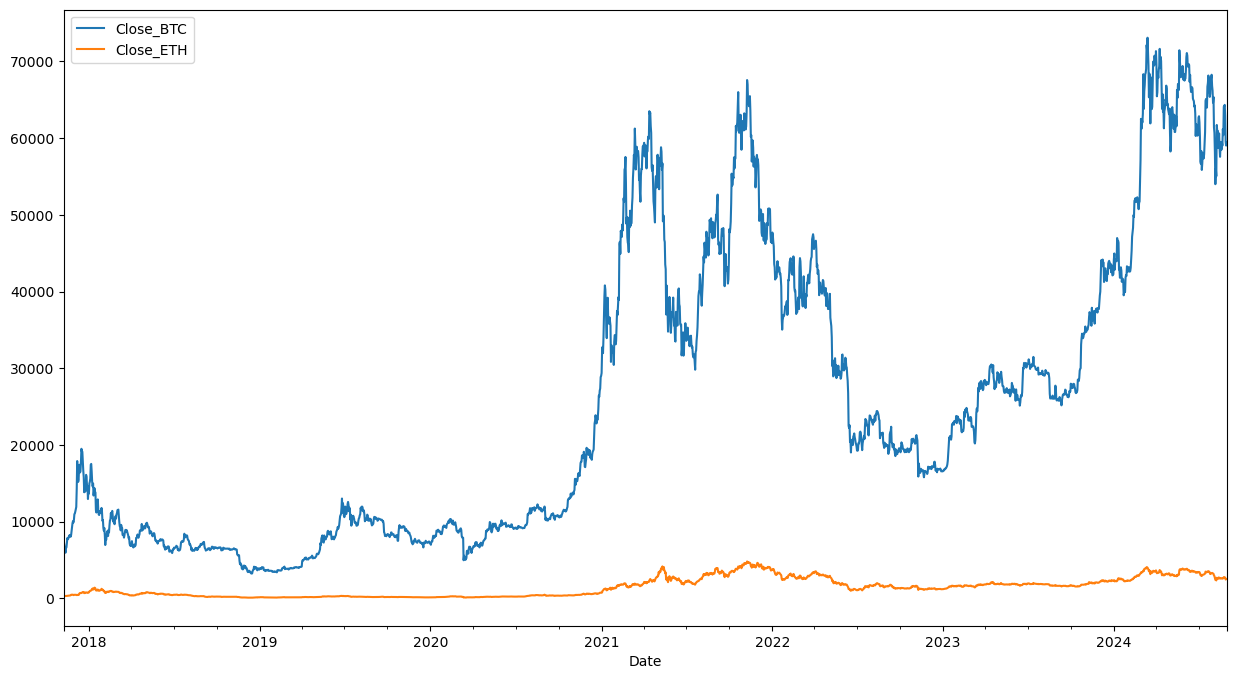

In [26]:
btc_eth[['Close_BTC','Close_ETH']].plot(figsize=(15,8)) 
#on met [[]] au lieu de [ ]  par ce que si vous utilisez pas suffixes vous allez trouver que les variables de
# di suffixés par x et de de par y donc on peut la considérer comme un dataframe de 2_dim.

In [27]:
# il est un petit peut diffice de lire les donnés de l'eth, c'est pourquoi c'est mieux d'utiliser les subplots

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

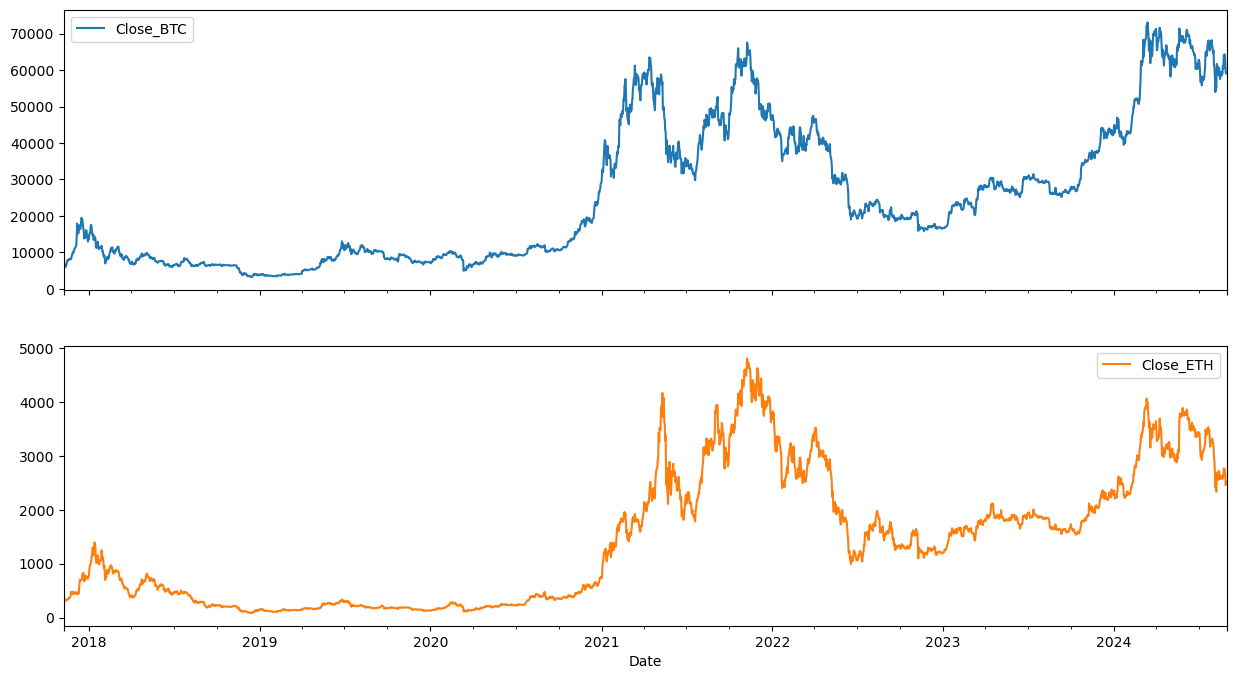

In [28]:
btc_eth[['Close_BTC','Close_ETH']].plot(subplots=True, figsize=(15,8)) 

In [29]:
#il semble qu'il y a une grande corrélation entre c'est deut courbe
btc_eth[['Close_BTC','Close_ETH']].corr() # ça c'est la matrice de correlation 

# on a une correlation de 0.93 de 2018 à aujourd'hui

,Close_BTC,Close_ETH
Close_BTC,1.000000,0.930943
Close_ETH,0.930943,1.000000


### trutle strategy 

<Axes: xlabel='Date'>

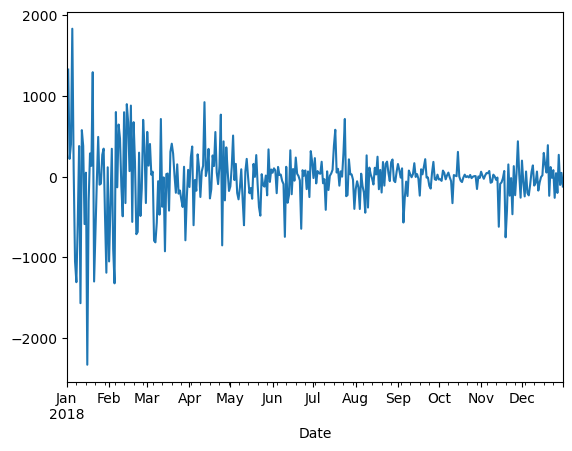

In [30]:
#fonction diff pour savoir les variation de jour à jour 
di['Close']['2018'].diff().plot() # on voit que le bitcoin est très volatile 

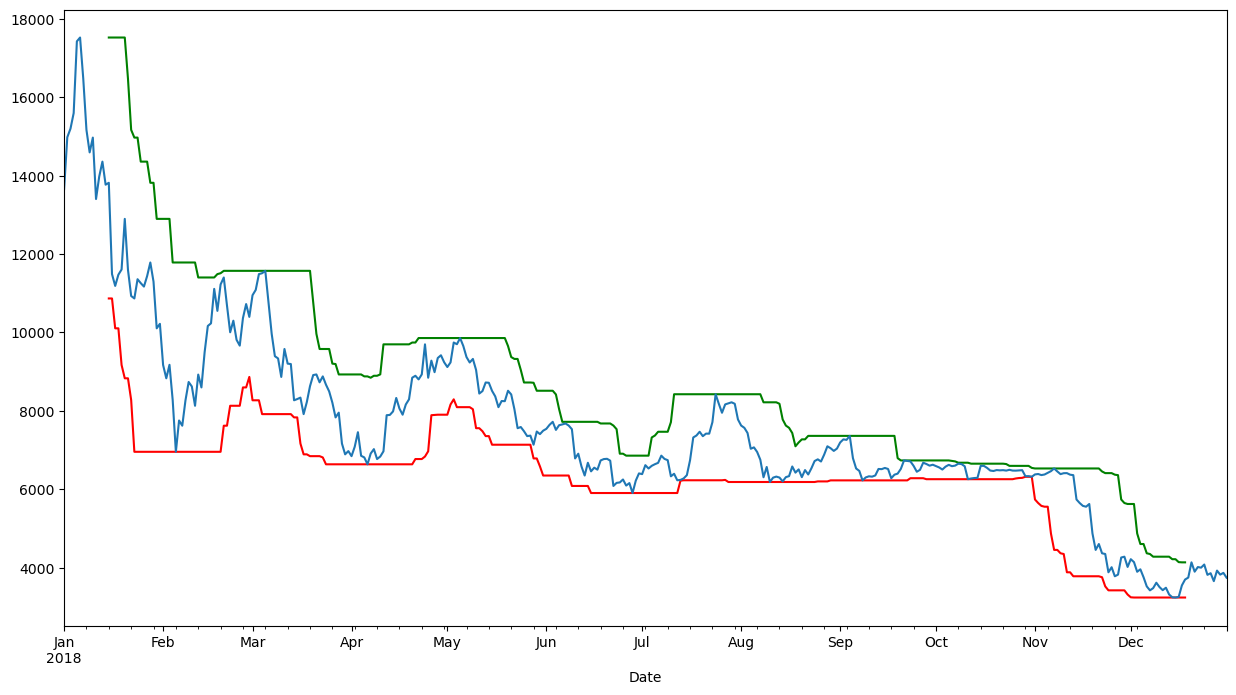

In [31]:
plt.figure(figsize=(15,8))
di['Close']['2018'].rolling(window=28, center=True).max().plot(color='green')
di['Close']['2018'].rolling(window=28, center=True).min().plot(color='red')
di['Close']['2018'].plot()
plt.savefig('plot.png')



# loc() basée sur les noms des index 
# iloc( basée sur la position des valeur que vous voulez
#### Accès à une ligne spécifique par sa position numérique
print(df.iloc[1])  # Renvoie la deuxième ligne (index 1)

#### Accès à une cellule spécifique (deuxième ligne, première colonne)
print(df.iloc[1, 0])  # Renvoie la valeur 2

#### Accès à un sous-ensemble de données (lignes 0 à 2, colonnes 0 et 1)
print(df.iloc[0:3, [0, 1]])

#### Accès à une ligne spécifique par son label
print(df.loc['b'])  # Renvoie la ligne avec l'index 'b'

#### Accès à une cellule spécifique (ligne 'b', colonne 'A')
print(df.loc['b', 'A'])  # Renvoie la valeur 2

#### Accès à un sous-ensemble de données (lignes 'a' à 'c', colonnes 'A' et 'B')
print(df.loc['a':'c', ['A', 'B']])

In [32]:
di['buy'] =np.zeros(len(di))
di['sell'] =np.zeros(len(di))
di['rol_min']=di['Close']['2018'].shift(1).rolling(window=28).min()
di['rol_max']=di['Close']['2018'].shift(1).rolling(window=28).max()
di.loc[di['rol_max']<di['Close'], 'sell']= -1
di.loc[di['rol_min']>di['Close'], 'buy']= 1


In [33]:
len(di)
di

,Open,High,Low,Close,Adj Close,Volume,buy,sell,rol_min,rol_max
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.0,0.0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.0,0.0,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.0,0.0,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.0,0.0,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,64333.542969,18827683555,0.0,0.0,NaN,NaN
2024-08-26,64342.226563,64489.707031,62849.558594,62880.660156,62880.660156,27682040631,0.0,0.0,NaN,NaN
2024-08-27,62879.707031,63210.796875,58116.750000,59504.132813,59504.132813,39103882198,0.0,0.0,NaN,NaN


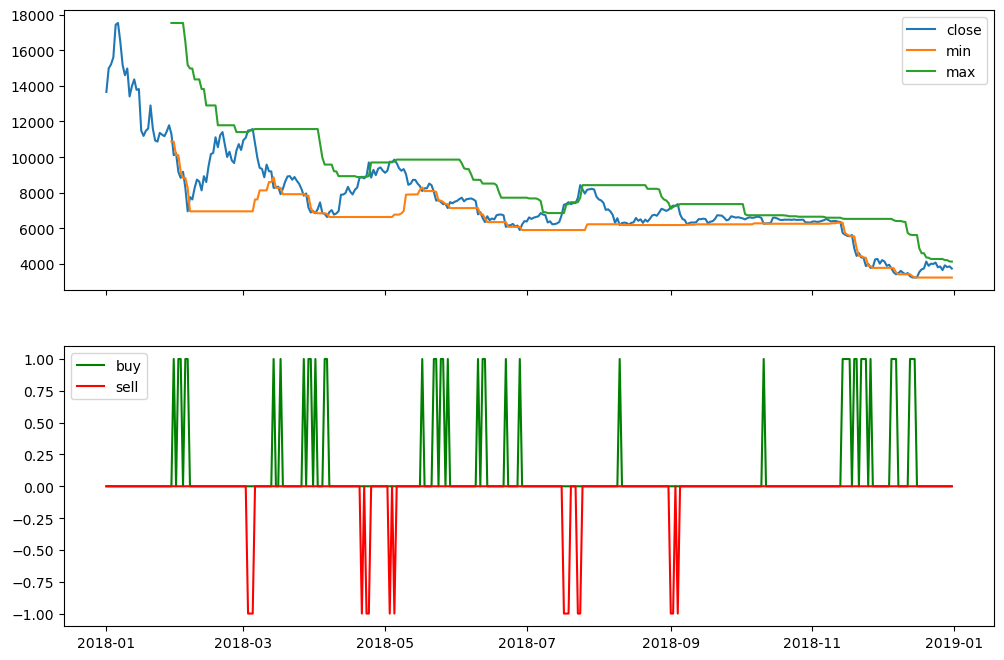

In [34]:

start ='2018'
end='2018'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(di['Close'][start:end])
ax[0].plot(di['rol_min'][start:end])
ax[0].plot(di['rol_max'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(di['buy'][start:end], c='g')
ax[1].plot(di['sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])


# df = pd.DataFrame({
 #   'A': [1, 2, 3, 4],
 #   'B': [5, 6, 7, 8],
 #   'C': [9, 10, 11, 12]
# }, index=['a', 'b', 'c', 'd']) 

### quoi ressamble un data frame 

### index ce sont le noms des column 
### et les clefs sont des lignes

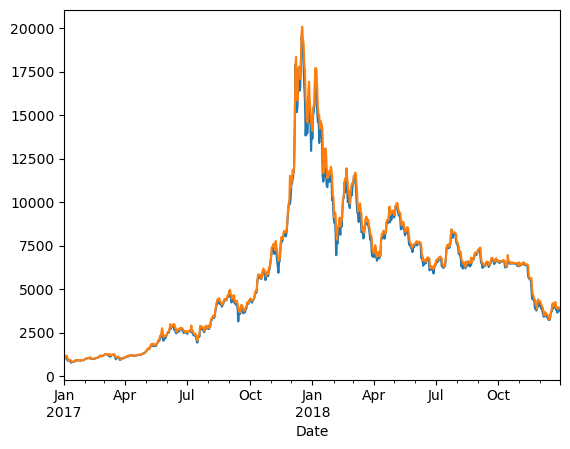

In [50]:
plt.figure()
di.loc['2017' : '2018', 'Close'].plot()
di.loc['2017': '2018', 'High'].plot()
plt.show()


In [72]:

type(di.loc['2019', 'Close'].resample('W'))





pandas.core.resample.DatetimeIndexResampler